<h4> Classificación de semillas de calabaazs con SVM </h4>

In [91]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#Cogemos el dataset
df = pd.read_csv("Semillas_calabazas_dataset.csv")

In [93]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [94]:
#Separamos el dataset de las 2 clases de semillas
df1=df[df["Class"]=="Ürgüp Sivrisi"]
df0=df[df["Class"]=="Çerçevelik"]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


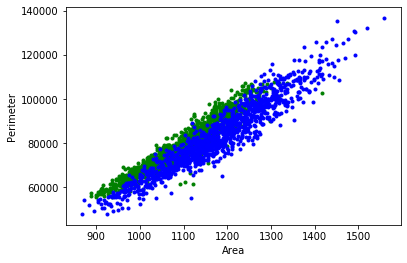

In [95]:
#Hacemos un gráfico para ver las diferencia de las semillas 
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.scatter(df0['Perimeter'], df0['Area'],color="green",marker='.')
plt.scatter(df1['Perimeter'], df1['Area'],color="blue",marker='.')

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = df.drop(['Class'], axis='columns')
y = df.Class

In [98]:
#Separamos los datos para entrenar y testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
#Importamos el svc para entrenar los datos
from sklearn.svm import SVC
#Ponemos un parametro de regularización de 100000
model = SVC(C=100000)

In [118]:
#Entrenamos el modelo 
model.fit(X_train, y_train)
#Comprobamos el resultado
model.score(X_test, y_test)

0.9

In [125]:
#Ahora entreno otra vez pero esta vez quitando la regularización y poniendo kernel lineal
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.88

In [108]:
#Ahora simplemente predecimos en el modelo con la regularización modificada
model.predict([[72626,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207]])

array(['Ürgüp Sivrisi'], dtype=object)

In [119]:
#Ahora simplemente predecimos en el modelo del kernel lineal
model_linear_kernal.predict([[72626,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207]])

array(['Ürgüp Sivrisi'], dtype=object)